In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_datareader as data
import yfinance as yf

In [2]:

start = '2010-01-01'
end = '2023-7-30'

df = yf.download('BTC-USD', start ,end )
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.shape


(3238, 6)

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-25,29178.970703,29353.160156,29062.433594,29227.390625,29227.390625,10266772793
2023-07-26,29225.759766,29675.552734,29113.912109,29354.972656,29354.972656,13497554655
2023-07-27,29353.798828,29560.966797,29099.351562,29210.689453,29210.689453,10770779217
2023-07-28,29212.164062,29521.513672,29125.845703,29319.246094,29319.246094,11218474952
2023-07-29,29319.445312,29396.843750,29264.166016,29356.917969,29356.917969,6481775959


In [5]:
df = df.reset_index()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3233,2023-07-25,29178.970703,29353.160156,29062.433594,29227.390625,29227.390625,10266772793
3234,2023-07-26,29225.759766,29675.552734,29113.912109,29354.972656,29354.972656,13497554655
3235,2023-07-27,29353.798828,29560.966797,29099.351562,29210.689453,29210.689453,10770779217
3236,2023-07-28,29212.164062,29521.513672,29125.845703,29319.246094,29319.246094,11218474952


In [7]:
df.drop(['Date' , 'Adj Close'], axis= 1, inplace  = True)

In [8]:
df

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
3233,29178.970703,29353.160156,29062.433594,29227.390625,10266772793
3234,29225.759766,29675.552734,29113.912109,29354.972656,13497554655
3235,29353.798828,29560.966797,29099.351562,29210.689453,10770779217
3236,29212.164062,29521.513672,29125.845703,29319.246094,11218474952


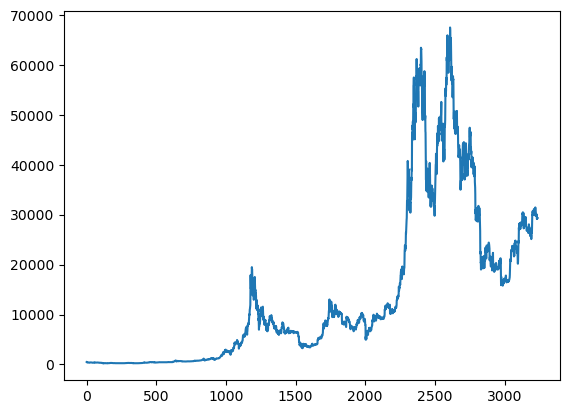

In [9]:
plt.plot(df['Close'])

In [10]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3233    28425.928398
3234    28425.027676
3235    28413.159043
3236    28418.124707
3237    28429.234004
Name: Close, Length: 3238, dtype: float64


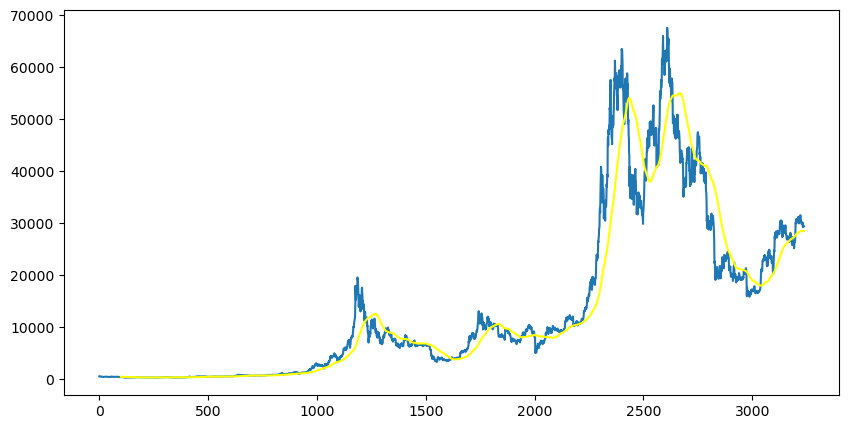

In [11]:
plt.figure(figsize= (10,5))
plt.plot(df.Close)
plt.plot(ma100 , color = 'yellow')
plt.show()

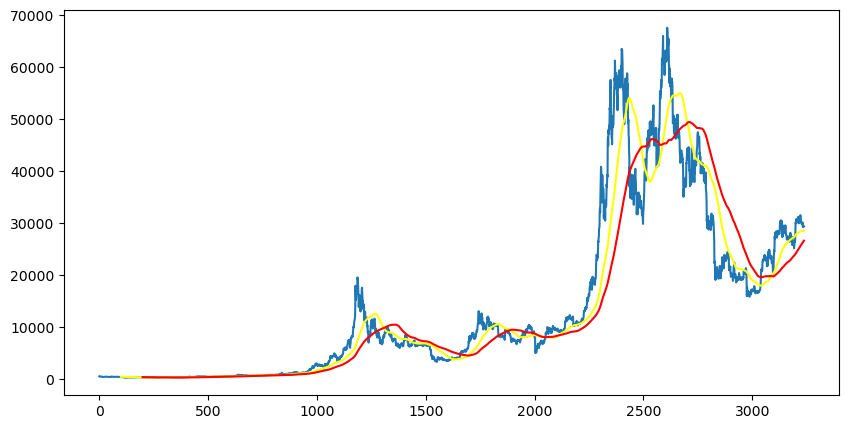

In [13]:
ma200= df.Close.rolling(200).mean()
plt.figure(figsize= (10,5))
plt.plot(df.Close)
plt.plot(ma100 , color = 'yellow')
plt.plot(ma200 , color = 'red')

plt.show()

In [17]:
#spltting data into train test 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(' taining ', data_training.shape)
print(' testing ', data_testing.shape)

 taining  (2266, 1)
 testing  (972, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)

In [18]:
data_training_array

array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       ...,
       [0.87634136],
       [0.90786485],
       [0.93167888]])

In [19]:
x_train = []
y_train = []

for i in range(100 ,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#ML model 
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50 )

Epoch 1/50
68/68 [==============================] - 48s 439ms/step - loss: 0.0215
Epoch 2/50
68/68 [==============================] - 29s 431ms/step - loss: 0.0068
Epoch 3/50
68/68 [==============================] - 29s 431ms/step - loss: 0.0061
Epoch 4/50
68/68 [==============================] - 29s 425ms/step - loss: 0.0059
Epoch 5/50
68/68 [==============================] - 27s 397ms/step - loss: 0.0054
Epoch 6/50
68/68 [==============================] - 27s 395ms/step - loss: 0.0048
Epoch 7/50
68/68 [==============================] - 28s 412ms/step - loss: 0.0054
Epoch 8/50
68/68 [==============================] - 30s 443ms/step - loss: 0.0041
Epoch 9/50
68/68 [==============================] - 30s 439ms/step - loss: 0.0047
Epoch 10/50
68/68 [==============================] - 29s 433ms/step - loss: 0.0044
Epoch 11/50
68/68 [==============================] - 30s 444ms/step - loss: 0.0038
Epoch 12/50
68/68 [==============================] - 29s 422ms/step - loss: 0.0037
Epoch 13/50
6

In [24]:
model.save('model.h5')

C:\Users\Nitesh\.android\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
data_testing.head()

,Close
2266,19625.835938
2267,18802.998047
2268,19201.091797
2269,19445.398438
2270,18699.765625


In [28]:
pass_100_days = data_training.tail(100)

In [29]:
final_df = pd.concat([pass_100_days, data_testing], ignore_index=True)

In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02699226],
       [0.02669666],
       [0.02860747],
       ...,
       [0.33218542],
       [0.33407548],
       [0.33473138]])

In [31]:
input_data.shape

(1072, 1)

In [32]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [33]:
x_test, y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(972, 100, 1)
(972,)


In [34]:
#make prediction 

y_predicted = model.predict(x_test)

31/31 [==============================] - 3s 74ms/step


In [35]:
y_predicted.shape

(972, 1)

In [36]:
y_test

array([0.16530457, 0.15097823, 0.15790939, 0.16216299, 0.14918086,
       0.1570935 , 0.16041707, 0.15774467, 0.14258873, 0.14664149,
       0.14161106, 0.13802289, 0.15098969, 0.15688722, 0.15870251,
       0.16166987, 0.19463777, 0.22065947, 0.2264538 , 0.23919632,
       0.2323619 , 0.22062326, 0.23768501, 0.22825382, 0.23686531,
       0.25303727, 0.28389365, 0.28102535, 0.29517193, 0.3000057 ,
       0.32574798, 0.32854708, 0.33503145, 0.38296564, 0.39436553,
       0.3802608 , 0.41543978, 0.46474627, 0.50908623, 0.53392403,
       0.52446882, 0.49142111, 0.44284847, 0.41423027, 0.47331236,
       0.50588759, 0.46476375, 0.45349496, 0.44675932, 0.46136352,
       0.45160873, 0.44251929, 0.36030418, 0.39826101, 0.38192752,
       0.38578815, 0.38712902, 0.39067139, 0.35345904, 0.40627587,
       0.42108016, 0.42026423, 0.40015179, 0.4075134 , 0.44186706,
       0.47602377, 0.46651701, 0.48772769, 0.50725754, 0.50094487,
       0.62792292, 0.63287876, 0.6056669 , 0.65774546, 0.65070

In [37]:
y_predicted

array([[0.13754211],
       [0.13992612],
       [0.14199197],
       [0.14384027],
       [0.14557281],
       [0.1472244 ],
       [0.14883754],
       [0.15047292],
       [0.15215002],
       [0.15382263],
       [0.1554113 ],
       [0.1568411 ],
       [0.15804248],
       [0.15899202],
       [0.15971142],
       [0.16025552],
       [0.16071112],
       [0.16136037],
       [0.16271469],
       [0.16563272],
       [0.17074844],
       [0.1779273 ],
       [0.18605727],
       [0.19432503],
       [0.20187005],
       [0.20823349],
       [0.21375245],
       [0.22015074],
       [0.2285467 ],
       [0.23951042],
       [0.25248954],
       [0.26757312],
       [0.28310513],
       [0.297517  ],
       [0.31305277],
       [0.33043727],
       [0.3463651 ],
       [0.36122113],
       [0.37868702],
       [0.40206006],
       [0.43094924],
       [0.45903274],
       [0.47676462],
       [0.47834942],
       [0.4673713 ],
       [0.45200163],
       [0.44035563],
       [0.432

In [38]:
scaler.scale_

array([1.74108919e-05])

In [40]:
scale_factor = 1/0.00654697
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

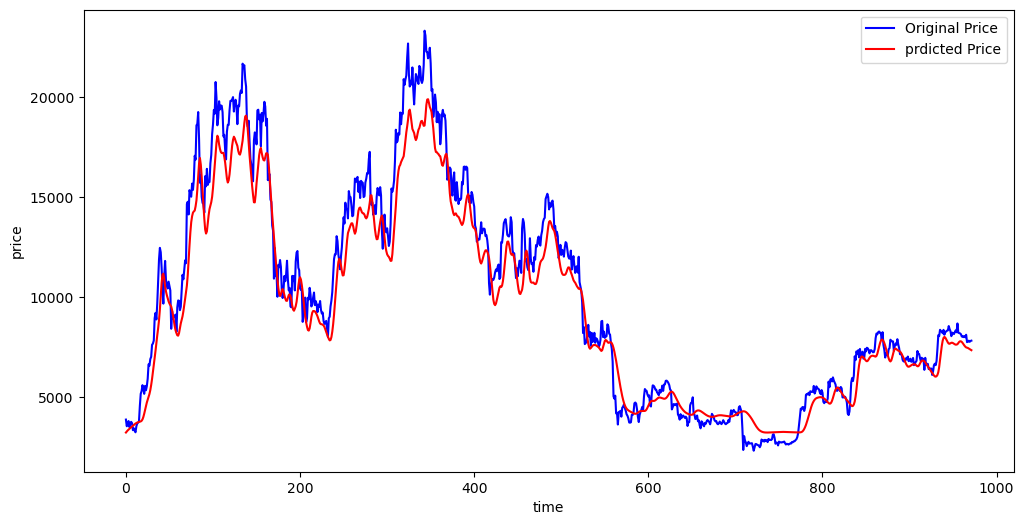

In [41]:
plt.figure(figsize= (12,6))
plt.plot(y_test , 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'prdicted Price')

plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()